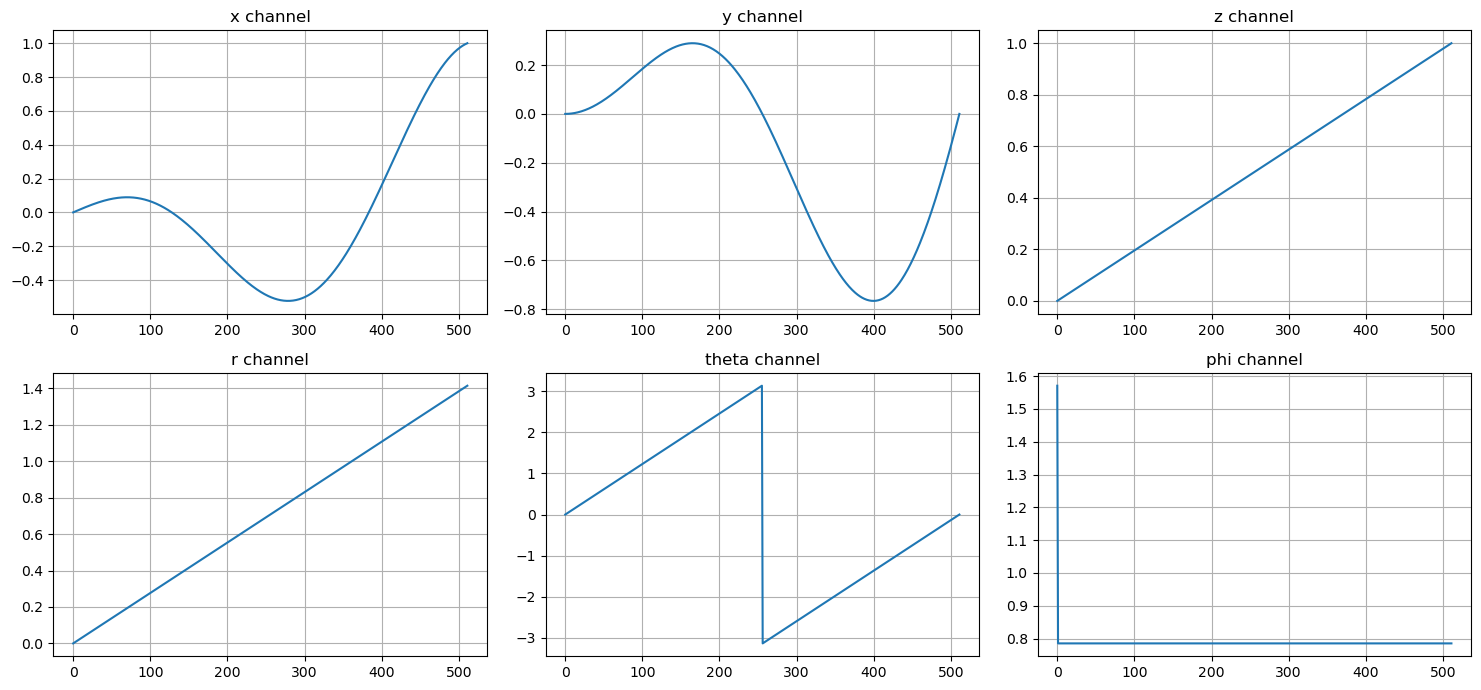

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Positional encoding function
def add_positional_encoding(xyz):
    x, y, z = xyz[..., 0], xyz[..., 1], xyz[..., 2]
    r = torch.sqrt(x ** 2 + y ** 2 + z ** 2) + 1e-8
    theta = torch.atan2(y, x)  # horizontal angle
    phi = torch.acos(torch.clamp(z / r, min=-1.0, max=1.0))  # vertical angle

    pe = torch.stack([x, y, z, r, theta, phi], dim=-1)
    return pe

# Generate a simple synthetic point cloud (e.g., dome shape)
B, N = 1, 512
theta_vals = torch.linspace(0, 2 * np.pi, N)
z_vals = torch.linspace(0, 1, N)
x = torch.cos(theta_vals) * z_vals
y = torch.sin(theta_vals) * z_vals
xyz = torch.stack([x, y, z_vals], dim=-1).unsqueeze(0)  # (1, N, 3)

# Apply positional encoding
pe = add_positional_encoding(xyz).squeeze(0).numpy()  # (N, 6)

# Plot each PE channel
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
channels = ['x', 'y', 'z', 'r', 'theta', 'phi']
for i in range(6):
    axs[i // 3][i % 3].plot(pe[:, i])
    axs[i // 3][i % 3].set_title(f"{channels[i]} channel")
    axs[i // 3][i % 3].grid(True)

plt.tight_layout()
plt.show()